In [1]:
# Run some setup code for this notebook.

import matplotlib.pyplot as plt


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load Dataset

In [2]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [4]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
################################################################################
# TODO:                                                                        #
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value #
################################################################################

df["Credit_History"] = df["Credit_History"].astype(str)

# fill numeric values with mean
mean = df.mean(numeric_only=True)
df = df.fillna(value=mean)

# fill string values with mode
mode = df.mode()
mode = {k: mode[k][0] for k in mode}
df = df.fillna(value=mode)

df.isnull().sum()

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode 

In [6]:
################################################################################
# TODO:                                                                        #
# Task2 deal with categorical features
# Tip use pd.get_dummies. 
################################################################################

df = pd.get_dummies(df)

# drop useless columns for 2-value properties
df = df.drop(["Gender_Female", "Married_No", "Education_Not Graduate", "Self_Employed_No", "Loan_Status_N", "Credit_History_0.0"], axis=1)

df.head()

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1,0,1,0,0,0,1,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1,1,1,0,0,0,1,1,1,0,0,0,1,1
3,2583,2358.0,120.000000,360.0,1,1,1,0,0,0,0,0,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1,0,1,0,0,0,1,0,1,0,0,0,1,1


## Data process

In [7]:
import numpy as np


def normalization(data):
    range = np.max(data) - np.min(data)
    return (data - np.min(data)) / range


# normalize data

for key in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]:
    df[key] = np.sqrt(df[key])
    df[key] = normalization(df[key])

df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.235835,0.000000,0.387939,0.840864,1,0,1,0,0,0,1,0,1,0,0,0,1,1
1,0.203594,0.190241,0.354416,0.840864,1,1,0,1,0,0,1,0,1,0,1,0,0,0
2,0.156136,0.000000,0.218439,0.840864,1,1,1,0,0,0,1,1,1,0,0,0,1,1
3,0.141637,0.237890,0.339100,0.840864,1,1,1,0,0,0,0,0,1,0,0,0,1,1
4,0.239436,0.000000,0.378316,0.840864,1,0,1,0,0,0,1,0,1,0,0,0,1,1


In [8]:
def split(df, r=0.8):
    df = df.sample(frac=1).reset_index(drop=True)
    train_size = int(df.shape[0] * r)
    train, test = df.loc[0:train_size], df.loc[train_size:]
    return train, test


def split_XY(df):
    df_X = df.drop(["Loan_Status_Y"], axis=1)
    df_Y = df["Loan_Status_Y"]
    return df_X, df_Y


################################################################################
# TODO:                                                                        #
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
################################################################################


df_Yes = df[df["Loan_Status_Y"] == 1]
df_No = df[df["Loan_Status_Y"] == 0]
train_Yes, test_Yes = split(df_Yes, 0.8)
train_No, test_No = split(df_No, 0.8)
train = pd.concat([train_Yes, train_No])
test = pd.concat([test_Yes, test_No])
train_X, train_Y = split_XY(test)
test_X, test_Y = split_XY(test)

train_X.head()

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
337,0.155464,0.223588,0.339100,0.840864,1,0,1,0,0,0,1,0,1,0,1,0,0
338,0.182851,0.153596,0.298412,0.840864,1,1,0,0,0,1,0,0,1,0,0,1,0
339,0.177644,0.321284,0.431200,0.840864,1,0,1,0,0,0,1,0,1,0,1,0,0
340,0.179873,0.000000,0.331251,0.840864,1,1,0,1,0,0,1,0,1,0,0,1,0
341,0.192016,0.000000,0.154886,0.840864,0,0,1,0,0,0,1,0,1,0,0,1,0


## Train

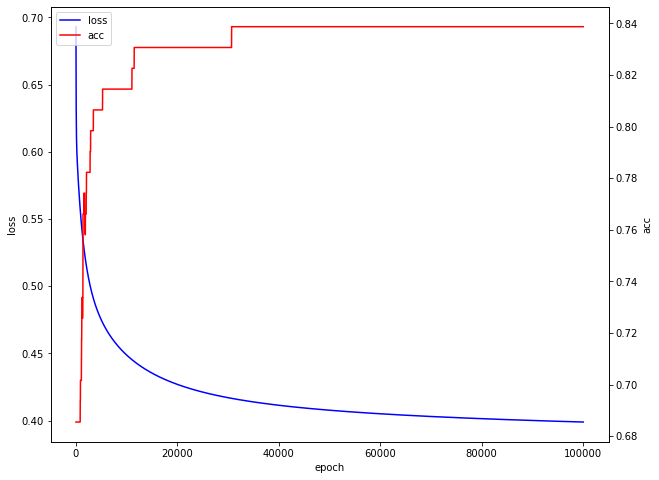

In [9]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt

################################################################################
# TODO:                                                                        #
# Task4 train your model and plot the loss curve of training
# You need to complete the Logistic.py file
# model = LogisticRegression()
################################################################################

model = LogisticRegression(penalty="l2", gamma=2e-5, fit_intercept=True)

loss, acc = model.fit(
    train_X, train_Y, lr=0.01, tol=1e-8, max_iter=10**5, test_X=test_X, test_y=test_Y
)

plt.xlabel("epoch")
plt.ylabel("loss")
(h1,) = plt.plot(loss, "b", label="loss")
plt.twinx()
plt.ylabel("acc")
(h2,) = plt.plot(acc, "r", label="acc")
plt.legend(handles=[h1, h2], loc="best")

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

## Test

In [10]:
################################################################################
# TODO:                                                                        #
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
################################################################################

print(model.predict_acc(test_X, test_Y))


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

0.8387096774193549
0.8387096774193549
0.8387096774193549
